In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("data_science_job.csv")
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [17]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [21]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [22]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [28]:
new_df = df[cols].dropna()
new_df.shape, df[cols].shape

((17182, 5), (19158, 5))

In [31]:
new_df.sample(2)

,city_development_index,enrolled_university,education_level,experience,training_hours
5993,0.884,no_enrollment,Graduate,7.0,37.0
19156,0.802,no_enrollment,High School,0.0,97.0


array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

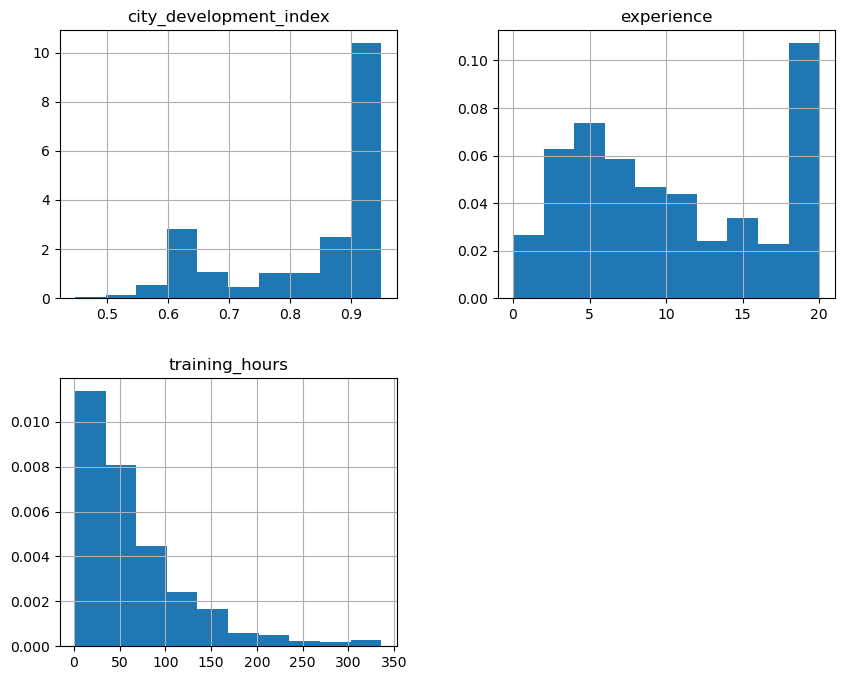

In [32]:
# data distribution through histogram
new_df.hist(bins=10, density=True, figsize=(10, 8))

<Axes: >

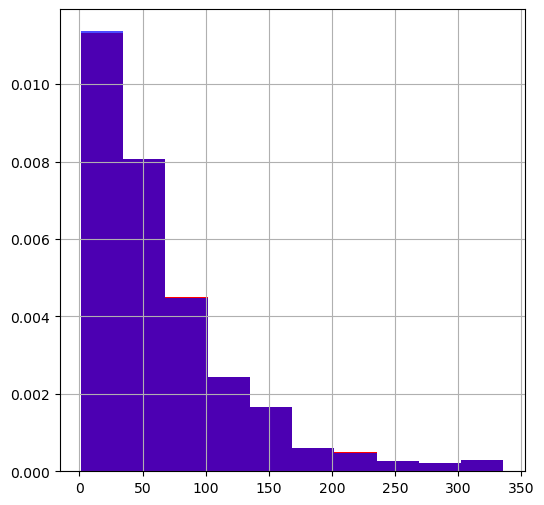

In [39]:
# show comparison of training hours
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=10, density=True, ax=ax, color='red')
new_df['training_hours'].hist(bins=10, density=True, ax=ax, color='blue', alpha=0.7)

<Axes: ylabel='Density'>

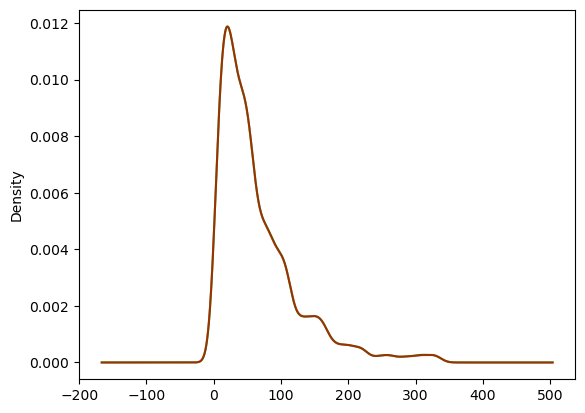

In [45]:
# comparsion
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='green')
new_df['training_hours'].plot.density(color='red', alpha=0.6)

<Axes: >

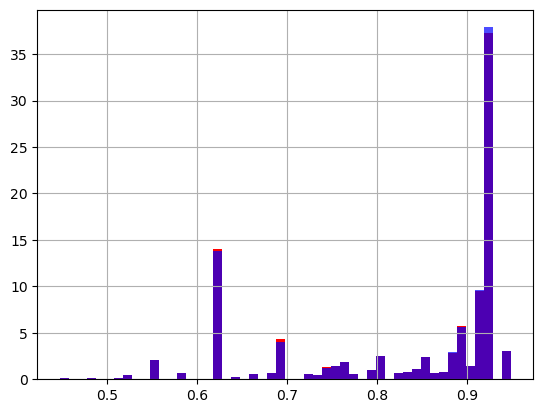

In [49]:
# city development comparison
df['city_development_index'].dtype

fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, density=True, ax=ax, color='red')
new_df['city_development_index'].hist(bins=50, density=True, ax=ax, color='blue', alpha=0.7)    